In [212]:
import sys
print(f'Python binary: {sys.executable}')

Python binary: /opt/homebrew/Cellar/jupyterlab/4.0.3/libexec/bin/python3.11


In [213]:
import os
import pandas as pd

# Load the data
data = pd.read_csv(os.path.expanduser('~/workspace/citi-bike-data/2023-08-05.csv'))

# Drop duplicates, keeping only the first occurrence of each station
data = data.drop_duplicates(subset='Name', keep='first')

# Calculate the total capacity for each station
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each station
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Now calculate the total (city-wide) metrics
total_bikes = data['BikesAvailable'].sum() + data['EBikesAvailable'].sum() + data['BikesDisabled'].sum()
total_regular_bikes = data['BikesAvailable'].sum()
total_ebikes = data['EBikesAvailable'].sum()
bike_ratio = total_regular_bikes / total_ebikes
total_broken_bikes = data['BikesDisabled'].sum()
perc_broken_bikes = 100 * total_broken_bikes / total_bikes
total_broken_docks = data['DocksDisabled'].sum()
total_capacity = data['TotalCapacity'].sum()
perc_broken_docks = 100 * total_broken_docks / total_capacity
perc_docks_available = 100 * data['DocksAvailable'].sum() / total_capacity

print('Statistics related to all Citi Bikes:')
print(f'Total number of bikes: {total_bikes}')
print(f'Total number of regular bikes: {total_regular_bikes}')
print(f'Total number of Ebikes: {total_ebikes:}')
print(f'Regular bike to Ebike ratio: {bike_ratio:.2f}')
print(f'Total number of broken bikes: {total_broken_bikes}')
print(f'Percentage of broken bikes: {perc_broken_bikes:.2f}%')
print(f'Total number of broken docks: {total_broken_docks}')
print(f'Percentage of broken docks: {perc_broken_docks:.2f}%')
print(f'Percentage of available docks: {perc_docks_available:.2f}%')

Statistics related to all Citi Bikes:
Total number of bikes: 37688
Total number of regular bikes: 28572
Total number of Ebikes: 3891
Regular bike to Ebike ratio: 7.34
Total number of broken bikes: 5225
Percentage of broken bikes: 13.86%
Total number of broken docks: 256
Percentage of broken docks: 0.39%
Percentage of available docks: 41.64%


In [214]:
import glob
import os
import pandas as pd

# get data file names
filenames = glob.glob(os.path.expanduser('~/Downloads/2023-08-06.csv'))

# create an empty list to store the data frames
dfs = []

for filename in filenames:
    df = pd.read_csv(filename)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print(f'The data contains {len(data)} records.')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Group by the 'TimeStamp' column and calculate the total capacity for the first timestamp
grouped_data = data.groupby('TimeStamp')['TotalCapacity'].sum()

# Get the last timestamp
last_timestamp = grouped_data.index[-1]

# Get the total capacity for the last timestamp
total_capacity_last_timestamp = grouped_data.loc[last_timestamp]

# Print total capacity of bikes in "Red Hook" for the last timestamp
print(f"Total citi bike capacity in 'Red Hook' at {last_timestamp}: {total_capacity_last_timestamp}")

The data contains 10944 records.
Total citi bike capacity in 'Red Hook' at 2023-08-06 23:59:21-04:00: 988


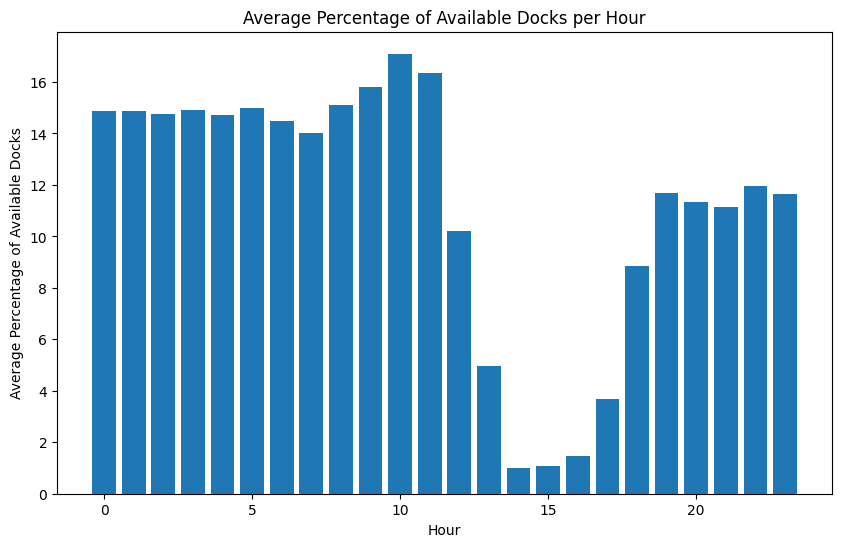

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Group by the 'Hour' column and calculate the average percentage of available docks
grouped_data = data.groupby('Hour')['PercentageAvailable'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Available Docks')
plt.title('Average Percentage of Available Docks per Hour')
plt.show()

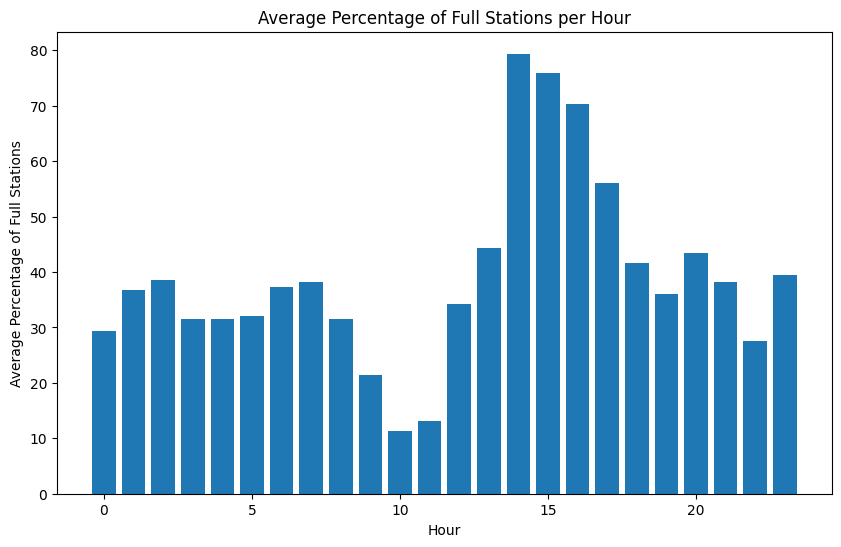

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

data['ZeroDocks'] = (data['DocksAvailable'] == 0).astype(int)
data['NumberOfStations'] = 1

grouped_data = data.groupby('Hour').agg({
    'ZeroDocks': 'sum', 
    'NumberOfStations': 'sum', 
    'TimeStamp': 'nunique'
})


# Calculate the percentage of full stations per hour
grouped_data['PercentageFullStations'] = (grouped_data['ZeroDocks'] / grouped_data['NumberOfStations']) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['PercentageFullStations'])
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Full Stations')
plt.title('Average Percentage of Full Stations per Hour')
plt.show()

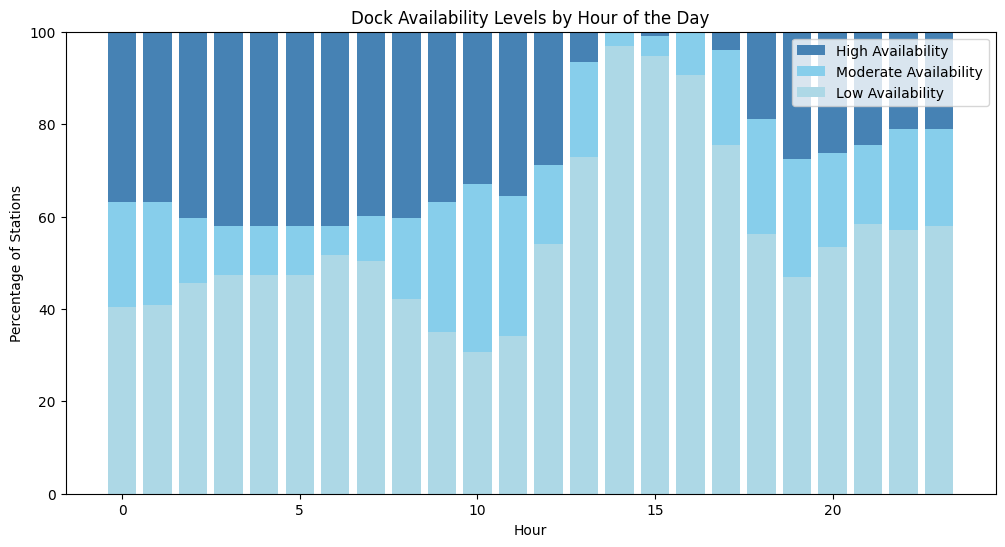

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

data['LowAvailability'] = (data['DocksAvailable'] < 2).astype(int)
data['ModerateAvailability'] = ((data['DocksAvailable'] >= 2) & (data['DocksAvailable'] < 5)).astype(int)
data['HighAvailability'] = (data['DocksAvailable'] >= 5).astype(int)

# Calculate the total number of stations
data['NumberOfStations'] = 1

# Group by the 'Hour' column
grouped_data = data.groupby('Hour').agg({
    'LowAvailability': 'sum',
    'ModerateAvailability': 'sum',
    'HighAvailability': 'sum',
    'NumberOfStations': 'sum',
})

# Calculate the percentage of stations for each availability level per hour
grouped_data['PercentageLowAvailability'] = (grouped_data['LowAvailability'] / grouped_data['NumberOfStations']) * 100
grouped_data['PercentageModerateAvailability'] = (grouped_data['ModerateAvailability'] / grouped_data['NumberOfStations']) * 100
grouped_data['PercentageHighAvailability'] = (grouped_data['HighAvailability'] / grouped_data['NumberOfStations']) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))

bar1 = plt.bar(grouped_data.index, grouped_data['PercentageHighAvailability'], bottom=grouped_data['PercentageLowAvailability'] + grouped_data['PercentageModerateAvailability'], color='steelblue', label='High Availability')
bar2 = plt.bar(grouped_data.index, grouped_data['PercentageModerateAvailability'], bottom=grouped_data['PercentageLowAvailability'], color='skyblue', label='Moderate Availability')
bar3 = plt.bar(grouped_data.index, grouped_data['PercentageLowAvailability'], color='lightblue', label='Low Availability')

plt.xlabel('Hour')
plt.ylabel('Percentage of Stations')
plt.title('Dock Availability Levels by Hour of the Day')

# Place the legend at the top right corner
plt.legend(loc='upper right')

plt.show()

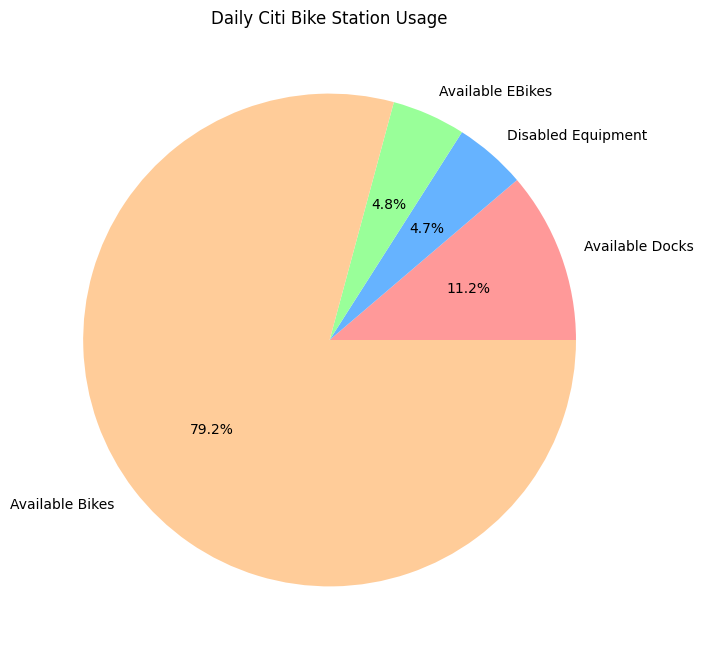

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Calculate the average percentage of available docks
average_percentage_available = data['PercentageAvailable'].mean()

# Calculate the average percentage of each category
average_percentage_disabled = (data['DocksDisabled'].sum() + data['BikesDisabled'].sum()) / data['TotalCapacity'].sum() * 100
average_percentage_ebikes_available = (data['EBikesAvailable'].sum() / data['TotalCapacity'].sum()) * 100
average_percentage_bikes_available = (data['BikesAvailable'].sum() / data['TotalCapacity'].sum()) * 100

# Define the data for the pie chart
sizes = [average_percentage_available, average_percentage_disabled, average_percentage_ebikes_available, average_percentage_bikes_available]
labels = ['Available Docks', 'Disabled Equipment', 'Available EBikes', 'Available Bikes']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Daily Citi Bike Station Usage')
plt.show()

In [219]:
import json
import pandas as pd
import folium
import numpy as np
from folium.plugins import HeatMap
from pandas import json_normalize
from matplotlib import pyplot as plt
from scipy.stats import zscore
from shapely.geometry import Point
import geopandas as gpd

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Load the station information
with open('station_info.json', 'r') as f:
    station_info = json.load(f)

stations = station_info['stations']  # Extract station data

# Convert station data to a dataframe
stations_df = pd.json_normalize(stations)  # Flatten JSON into a dataframe

# Merge the data with station information to get latitude and longitude
merged_data = pd.merge(data, stations_df, how="left", left_on="Name", right_on="name")  

# Calculate the total number of usable docks for each timestamp
merged_data['UsableDocks'] = merged_data['DocksAvailable'] - merged_data['DocksDisabled']

# Group by the 'Name' column and calculate the average number of usable docks
grouped_data = merged_data.groupby('Name')[['UsableDocks', 'longitude', 'latitude']].mean()

grouped_data = grouped_data.sort_values(by='UsableDocks')

# Define color assignment function
def assign_color(value):
    if value < 2:
        return 'red'
    elif 2 <= value < 5:
        return 'orange'
    else:
        return 'green'

# Create a new column 'Color' based on 'UsableDocks' values
grouped_data['Color'] = grouped_data['UsableDocks'].apply(assign_color)

# Convert latitude and longitude to geometric points
geometry = [Point(xy) for xy in zip(grouped_data['longitude'], grouped_data['latitude'])]

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(grouped_data, geometry=geometry)

# Create a Folium map centered on the mean of latitude and longitude
m = folium.Map(location=[grouped_data['latitude'].mean(), grouped_data['longitude'].mean()],
               zoom_start=15, tiles='CartoDB Positron')

# Add data to map
for idx, row in geo_df.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']),
                        radius=7,
                        fill=True,
                        fill_opacity=0.7,
                        color=row['Color'],
                        fill_color=row['Color']).add_to(m)

m.save('heatmap.html')

grouped_data_reset = grouped_data.reset_index()
print(grouped_data_reset[['Name', 'UsableDocks']].to_string(index=False))

                      Name  UsableDocks
 Columbia St & Lorraine St     0.156250
    Clinton St & Centre St     0.177083
         Henry St & Bay St     0.236111
      Columbia St & W 9 St     0.371528
   Columbia St & Degraw St     0.579861
  Carroll St & Columbia St     1.003472
Commerce St & Van Brunt St     1.274306
  Pioneer St & Richards St     1.809028
         Henry St & W 9 St     2.118056
    Wolcott St & Dwight St     2.593750
  Richards St & Delavan St     2.847222
   Dwight St & Van Dyke St     3.027778
Sigourney St & Columbia St     3.369792
 Pioneer St & Van Brunt St     3.378472
         Bay St & Court St     3.583333
 Van Brunt St & Wolcott St     5.001736
    Coffey St & Conover St     6.100694
     Coffey St & Ferris St     8.131944
Van Brunt St & Van Dyke St     9.236111


In [220]:
import json
import pandas as pd
import folium
import numpy as np
import geopandas as gpd
from folium.plugins import HeatMap
from pandas import json_normalize
from matplotlib import pyplot as plt
from scipy.stats import zscore
from shapely.geometry import Point

# Load the data
data = pd.read_csv(os.path.expanduser('~/workspace/citi-bike-data/2023-08-05.csv'))

# Only look at active stations
data = data[(data['IsReturning'] == 1) & (data['IsRenting'] == 1) & (data['IsInstalled'] == 1)]

# Load the station information
with open('all_stations.json', 'r') as f:
    station_info = json.load(f)

stations = station_info['stations']  # Extract station data

# Convert station data to a dataframe
stations_df = pd.json_normalize(stations)  # Flatten JSON into a dataframe

# Merge the data with station information to get latitude and longitude
merged_data = pd.merge(data, stations_df, how="left", left_on="Name", right_on="name")  

# Calculate the total number of usable docks for each timestamp
merged_data['UsableDocks'] = merged_data['DocksAvailable'] - merged_data['DocksDisabled']

# Group by the 'Name' column and calculate the average number of usable docks
grouped_data = merged_data.groupby('Name')[['UsableDocks', 'longitude', 'latitude']].mean()

grouped_data = grouped_data.sort_values(by='UsableDocks')

# Define color assignment function
def assign_color(value):
    if value < 2:
        return 'red'
    elif 2 <= value < 5:
        return 'orange'
    else:
        return 'green'

# Create a new column 'Color' based on 'UsableDocks' values
grouped_data['Color'] = grouped_data['UsableDocks'].apply(assign_color)

# Convert latitude and longitude to geometric points
geometry = [Point(xy) for xy in zip(grouped_data['longitude'], grouped_data['latitude'])]

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(grouped_data, geometry=geometry)

# Create a Folium map centered on the mean of latitude and longitude
m = folium.Map(location=[grouped_data['latitude'].mean(), grouped_data['longitude'].mean()],
               zoom_start=12, tiles='CartoDB Positron')

# Add data to map
for idx, row in geo_df.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']),
                        radius=3,
                        fill=True,
                        fill_opacity=0.7,
                        color=row['Color'],
                        fill_color=row['Color']).add_to(m)

m.save('heatmap_all.html')

grouped_data_reset = grouped_data.reset_index()
print(grouped_data_reset[['Name', 'UsableDocks']].to_string(index=False))

                                         Name  UsableDocks
                              W 54 St & 9 Ave   -32.000000
                             E 20 St & FDR Dr   -15.519164
                         Stagg St & Union Ave   -13.878049
                         Allen St & Hester St    -6.982609
                           Broadway & W 37 St    -3.688153
                        Lafayette St & E 8 St    -2.702970
                   St Nicholas Ave & W 134 St    -2.613240
                             Soissons Landing    -0.548780
                             12 Ave & W 40 St    -0.372822
                        Hart St & Wyckoff Ave    -0.318815
                               58 St & Pier 4    -0.101045
                                57 Rd & 58 St     0.000000
                                52 St & 1 Ave     0.003484
                               64 St & 51 Ave     0.020906
                    Jerome Ave & Anderson Ave     0.020906
                     Pioneer St & Richards St     0.0383

In [221]:
import os
import time

from selenium import webdriver

# Setup a webdriver
driver = webdriver.Chrome()

html_file_path = 'file://' + os.path.realpath('heatmap_all.html')

# Open the webpage
driver.get(html_file_path)

# Give the map tiles some time to load
time.sleep(1)

# Save a screenshot
driver.save_screenshot('heatmap_all.png')

# Close the driver
driver.quit()

In [222]:
import json
import pandas as pd
import folium
import numpy as np
import geopandas as gpd
from folium.plugins import HeatMap
from pandas import json_normalize
from matplotlib import pyplot as plt
from scipy.stats import zscore
from shapely.geometry import Point

# Load the data
data = pd.read_csv(os.path.expanduser('~/workspace/citi-bike-data/2023-08-05.csv'))

# Only look at active stations
data = data[(data['IsReturning'] == 1) & (data['IsRenting'] == 1) & (data['IsInstalled'] == 1)]

# Load the station information
with open('all_stations.json', 'r') as f:
    station_info = json.load(f)

stations = station_info['stations']  # Extract station data

# Convert station data to a dataframe
stations_df = pd.json_normalize(stations)  # Flatten JSON into a dataframe

# Merge the data with station information to get latitude and longitude
merged_data = pd.merge(data, stations_df, how="left", left_on="Name", right_on="name")  

# Calculate the total number of usable docks for each timestamp
merged_data['UsableDocks'] = merged_data['DocksAvailable'] - merged_data['DocksDisabled']


# Group by the 'Name' column, calculate the average number of usable docks and BikesAvailable
grouped_data = merged_data.groupby('Name')[['UsableDocks', 'BikesAvailable', 'longitude', 'latitude']].mean()

# Sort by 'UsableDocks' and then 'BikesAvailable'
grouped_data.sort_values(by=['UsableDocks', 'BikesAvailable'], inplace=True)

def assign_color(row):
    if row['UsableDocks'] < 3:
        return 'red'
    elif row['BikesAvailable'] < 3:
        return 'skyblue'
#     elif row['UsableDocks'] < 6:
#         return 'orange'
#     elif row['BikesAvailable'] < 6:
#         return 'skyblue'
    else:
        return 'green'  

grouped_data['Color'] = grouped_data.apply(assign_color, axis=1)

# Convert latitude and longitude to geometric points
geometry = [Point(xy) for xy in zip(grouped_data['longitude'], grouped_data['latitude'])]

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(grouped_data, geometry=geometry)

# Create a Folium map centered on the mean of latitude and longitude
m = folium.Map(location=[grouped_data['latitude'].mean()+0.01, grouped_data['longitude'].mean()],
               zoom_start=12, tiles='CartoDB Positron')

# Add data to map
for idx, row in geo_df.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']),
                        radius=4,
                        fill=True,
                        fill_opacity=0.7,
                        color=row['Color'],
                        fill_color=row['Color']).add_to(m)

m.save('heatmap_all.html')

grouped_data_reset = grouped_data.reset_index()
print(grouped_data_reset[['Name', 'BikesAvailable']].to_string(index=False))

                                         Name  BikesAvailable
                              W 54 St & 9 Ave        1.965157
                             E 20 St & FDR Dr       13.794425
                         Stagg St & Union Ave        6.054007
                         Allen St & Hester St      104.071739
                           Broadway & W 37 St        2.912892
                        Lafayette St & E 8 St       95.237624
                   St Nicholas Ave & W 134 St       20.188153
                             Soissons Landing       16.433798
                             12 Ave & W 40 St       69.520906
                        Hart St & Wyckoff Ave       22.275261
                               58 St & Pier 4       25.264808
                                57 Rd & 58 St       21.000000
                                52 St & 1 Ave       21.996516
                               64 St & 51 Ave       17.979094
                    Jerome Ave & Anderson Ave       18.982578
        